# Assigment 3 - GraphSage

For this assignment, we'll go through a simple example of how to use GraphSage's algorithm in a similar fashion as [Assignment 1](https://github.com/thmosqueiro/graph-attention-net-genomics-public/blob/main/notebooks/Chapter%201%20-%20Pytorch%20Intro.ipynb). Like before, getting 10 pts in this assignment gives you 100% grade. There are two extra points you can get if you want to go above and beyond (or if you want to catch up from a previous assignment).

For more info:
* https://snap.stanford.edu/graphsage/
* https://arxiv.org/pdf/1706.02216

The original publication uses Tensorflow. PyG (Pytorch Geommetric) implements solutions for Graph NNs, and include GraphSage:
* https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.nn.models.GraphSAGE.html
Here's their implementation of GraphSage (which is reproduced below):
* https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/nn/models/basic_gnn.html#GraphSAGE

In case you need to install pyg:

In [ ]:
pip install torch_geometric

In [1]:
# imports
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv
from torch_geometric.datasets import Planetoid
from torch_geometric.loader import DataLoader

In [3]:
# model definition
class GraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = SAGEConv(in_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv(x, edge_index)
        return F.log_softmax(x, dim=1)

In [18]:
# dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')

* **Question 1 (1 pt):** Visualize the training data using a classical dimensionality reduction technique.

Use `device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')` if you'd like to use CUDA.

In [27]:
# Setting up the model
model = GraphSAGE(dataset.num_node_features, dataset.num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

* **Question 2 (1 pt):** What's "weight decay"?

In [28]:
# Defining a training step
def train():
    model.train()
    optimizer.zero_grad()
    out = model(dataset.data)
    loss = F.nll_loss(out[dataset.data.train_mask], dataset.data.y[dataset.data.train_mask])
    loss.backward()
    optimizer.step()

# Defining a test step
def test():
    model.eval()
    with torch.no_grad():
        out = model(dataset.data)
        pred = out.argmax(dim=1)
        flag_is_correct = pred[dataset.data.test_mask] == dataset.data.y[dataset.data.test_mask]
        acc = int(flag_is_correct.sum()) / int(dataset.data.test_mask.sum())
        return acc

In [29]:
# Run one iteration
train()
acc = test()
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.5120


In [30]:
# Run for a few epochs:
accuracy = []
for epoch in range(100):
    train()
    accuracy.append(test())
    print(f'Accuracy on epoch {epoch+1}: {accuracy[-1]}')

Accuracy on epoch 1: 0.632
Accuracy on epoch 2: 0.661
Accuracy on epoch 3: 0.68
Accuracy on epoch 4: 0.68
Accuracy on epoch 5: 0.684
Accuracy on epoch 6: 0.686
Accuracy on epoch 7: 0.693
Accuracy on epoch 8: 0.699
Accuracy on epoch 9: 0.699
Accuracy on epoch 10: 0.701
Accuracy on epoch 11: 0.699
Accuracy on epoch 12: 0.698
Accuracy on epoch 13: 0.695
Accuracy on epoch 14: 0.698
Accuracy on epoch 15: 0.7
Accuracy on epoch 16: 0.697
Accuracy on epoch 17: 0.697
Accuracy on epoch 18: 0.698
Accuracy on epoch 19: 0.701
Accuracy on epoch 20: 0.701
Accuracy on epoch 21: 0.7
Accuracy on epoch 22: 0.7
Accuracy on epoch 23: 0.7
Accuracy on epoch 24: 0.701
Accuracy on epoch 25: 0.702
Accuracy on epoch 26: 0.699
Accuracy on epoch 27: 0.699
Accuracy on epoch 28: 0.698
Accuracy on epoch 29: 0.698
Accuracy on epoch 30: 0.7
Accuracy on epoch 31: 0.701
Accuracy on epoch 32: 0.701
Accuracy on epoch 33: 0.701
Accuracy on epoch 34: 0.704
Accuracy on epoch 35: 0.703
Accuracy on epoch 36: 0.703
Accuracy on e

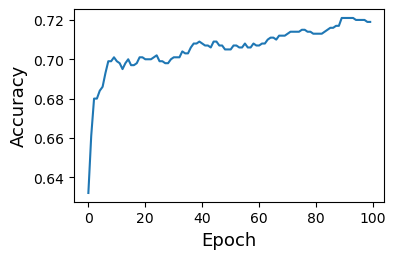

In [31]:
import pylab as pl
f, ax = pl.subplots(1, 1, figsize=(4, 2.5))
ax.plot(accuracy, '-')
ax.set_xlabel("Epoch", fontsize=13)
ax.set_ylabel("Accuracy", fontsize=13)
pl.show()

## Questions

* **Question 3 (1 pt):** Is this model predicting all classes equally well? Demonstrate differences by using any well known way of quantifying accuracy across multiple classes. (confusion matrix)

* **Question 4 (1 pt):** Compare this GraphSage with models from Weekly Assignment 2.

* **Question 5 (2 pt):** Change the aggregation function to `max`. What's the default?

* **Question 6 (2 pt):** Add one more layer to the model and investigate the performance change.

* **Question 7 (2 pt):** Add drop-out to this NN and show the impact to performance. How does it change the ROC curve.

* **Question 8 (4 pt):** Instead of using the Cora dataset, apply GraphSage to any other dataset of your choice. (UCI database)


Good luck! :)